<a href="https://colab.research.google.com/github/jadenfang/Linear-Regression-MedicalCharges/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting parameters: [Theta0: 0, Theta1: 0, Theta2: 0]
Hyperparameters: [Alpha: 0.01, Epochs: 1000]
Final parameters at convergence: [Theta0: 13269.849364458405, Theta1: 3397.719556642401, Theta2: 2029.7746111096806]:
Starting cost: 161323436.79435235
Final cost: 64685194.63226063
Regression Equation: Charge = 13269.8494 + 3397.7196 * age + 2029.7746 * bmi


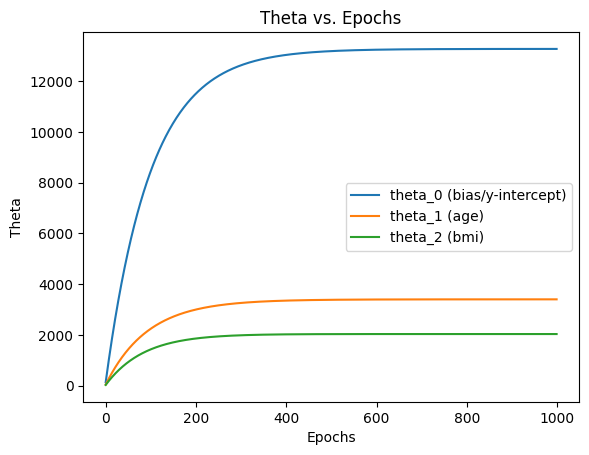

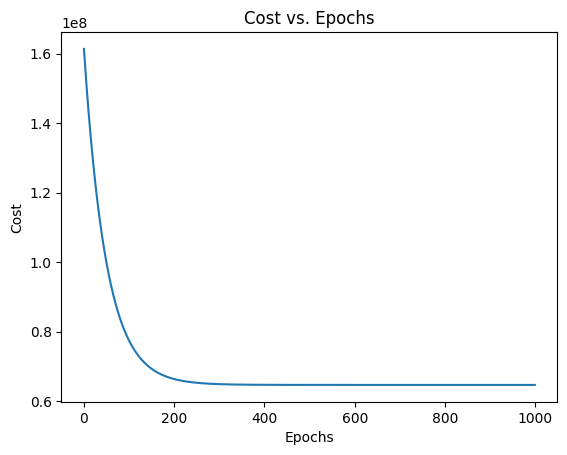

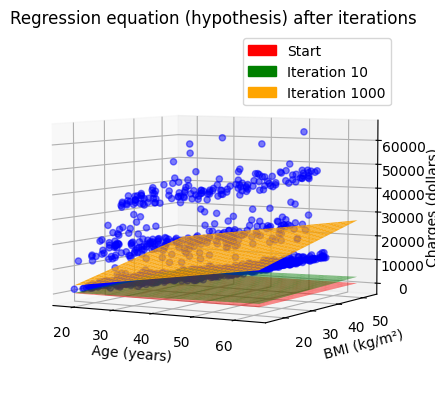

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = pd.read_csv("dataset.csv")

X = df[["age", "bmi"]].values
y = df["charges"].values

# Have to normalize Age and BMI since they are different units
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add column for theta0/y-intercept
X = np.c_[np.ones(X.shape[0]), X]

# Find equation using gradient descent
def gradientDescent(X, y, alpha, epochs):
  m, n = X.shape
  theta = np.zeros(n)

  # Store Cost and Theta values after each epoch so I can plot the change across iterations
  cost_history = []
  theta_history = []

  for _ in range(epochs): # Iterations
    predictedY = np.dot(X, theta) # Theta0 + Theta1 * Age + Theta2 * BMI
    errors = predictedY - y

    cost = (1 / (2*m)) * np.sum(errors ** 2) # Cost Function J
    gradient = (1 / m) * np.dot(X.T, errors) # Gradient Formula = Derivative of Cost Function = 1/m * x^T x errors
    theta -= alpha * gradient # Get new parameter values by subtracting learning rate * gradient

    cost_history.append(cost)
    theta_history.append(theta.copy())

  return theta, cost_history, np.array(theta_history)

# Print values
theta, cost_history, theta_history = gradientDescent(X, y, 0.01, 1000)
print("Starting parameters: [Theta0: 0, Theta1: 0, Theta2: 0]")
print("Hyperparameters: [Alpha: 0.01, Epochs: 1000]")
print("Final parameters at convergence: [Theta0: {:}, Theta1: {:}, Theta2: {:}]:".format(theta[0], theta[1], theta[2]))
print("Starting cost:", cost_history[0])
print("Final cost:", cost_history[-1])
print("Regression Equation:", "Charge = {:.4f} + {:.4f} * age + {:.4f} * bmi".format(theta[0], theta[1], theta[2]))

# Plot Theta across iterations
plt.plot(theta_history[:,0], label="theta_0 (bias/y-intercept)")
plt.plot(theta_history[:,1], label="theta_1 (age)")
plt.plot(theta_history[:,2], label="theta_2 (bmi)")
plt.xlabel("Epochs")
plt.ylabel("Theta")
plt.title("Theta vs. Epochs")
plt.legend()
plt.show()

# Plot Cost across iterations
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Cost vs. Epochs")
plt.show()

# Plot 3d graph to show equation change over iterations
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel("Age (years)")
ax.set_ylabel("BMI (kg/m²)")
ax.set_zlabel("Charges (dollars)")
ax.set_title("Regression equation (hypothesis) after iterations")

X_old = df[["age", "bmi"]].values

ax.scatter(X_old[:,0], X_old[:,1], y, c='blue', marker='o', alpha=0.5, label="Data");

ax.view_init(elev=5, azim=-60)
legend_elements = [
    Patch(facecolor='red', edgecolor='r', label='Start'),
    Patch(facecolor='green', edgecolor='g', label='Iteration 10'),
    Patch(facecolor='orange', edgecolor='orange', label='Iteration 1000'),
]
ax.legend(handles=legend_elements)

age_grid, bmi_grid = np.meshgrid(np.linspace(X_old[:,0].min(), X_old[:,0].max(), 30), np.linspace(X_old[:,1].min(), X_old[:,1].max(), 30)) # Create grid based off randomly generated age and bmi values

age = (age_grid - X_old[:,0].mean()) / X_old[:,0].std()
bmi = (bmi_grid - X_old[:,1].mean()) / X_old[:,1].std()

charges_start = theta_history[0][0] + theta_history[0][1]*age + theta_history[0] [2]*bmi     # plane equation after 0 iterations
charges_middle = theta_history[10][0] + theta_history[10][1]*age + theta_history[10][2]*bmi  # plane equation after 10 iterations
charges_emd = theta_history[-1][0] + theta_history[-1][1]*age + theta_history[-1][2]*bmi     # plane equation after 1000 iterations

ax.plot_surface(age_grid, bmi_grid, charges_start, color='red', alpha=0.5);
ax.plot_surface(age_grid, bmi_grid, charges_middle, color='green', alpha=0.5);
ax.plot_surface(age_grid, bmi_grid, charges_emd, color='orange', alpha=0.9);


